## Project 1
### PGA Tour Golf Stats

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import os

In [14]:
# Declare input file paths and file names
pga_data_hist_file = os.path.join(".", "input_data", "PGA_Data_Historical.csv")
player_exp_file = os.path.join(".", "input_data", "player_experience_data.csv")
conv_to_inches_file = os.path.join(".", "input_data", "convert_proximity_to_inches.csv")

In [22]:
# Load main player and stat data into dataframe
all_pga_data_df = pd.read_csv(pga_data_hist_file)

# Load player experience lookup table
player_exp_df = pd.read_csv(player_exp_file)

# Load DTP to inches conversion table
prox_inches_conv_df = pd.read_csv(conv_to_inches_file)

In [23]:
#Proximity to Hole (ARG) - (AVG DTP) (IN)

# Merge player experience into main dataframe
all_pga_data_df = all_pga_data_df.merge(player_exp_df, how='left', on="Player Name")

all_pga_data_df.head()


,Player Name,Season,Statistic,Variable,Value,Exp-Before-2010,Exp-Less_Eq-2012,Exp-Less_Eq-2015,Exp-Less_Eq-2018
0,Robert Garrigus,2010,Driving Distance,Driving Distance - (ROUNDS),71,4.0,7.0,10.0,13.0
1,Bubba Watson,2010,Driving Distance,Driving Distance - (ROUNDS),77,4.0,7.0,10.0,13.0
2,Dustin Johnson,2010,Driving Distance,Driving Distance - (ROUNDS),83,2.0,5.0,8.0,11.0
3,Brett Wetterich,2010,Driving Distance,Driving Distance - (ROUNDS),54,6.0,9.0,9.0,9.0
4,J.B. Holmes,2010,Driving Distance,Driving Distance - (ROUNDS),100,4.0,7.0,10.0,13.0


In [36]:
# Create a filtered dataframe with only the stats we are interested in

# Define list of stats to keep
keep_variable_stats =  ["Season",
                        "Driving Distance - (AVG.)",
                        "Driving Distance - (TOTAL DRIVES)",
                        "Putting Average - (AVG)",
                        "Total Driving - (TOTAL)",
                        "Total Driving - (DISTANCE RANK)",
                        "Total Driving - (ACCURACY RANK)",
                        "Total Money (Official and Unofficial) - (MONEY)" , 
                        "Proximity to Hole (ARG) - (AVG DTP)",
                        "Smash Factor - (AVG.)",
                        "Total Putting - (TOTAL)",
                        "Short Game Rating - (RATING)"]

# Define count of stats we are keeping for each player
desired_var_stats_cnt = len(keep_variable_stats)

# Create filtered dataframe
temp_filtered_stats = all_pga_data_df.copy()
temp_filtered_stats = temp_filtered_stats.loc[temp_filtered_stats["Variable"].isin(keep_variable_stats),:]

# Drop the Statistic column, and just keep the Variable column
temp_filtered_stats.drop(["Statistic"], axis=1, inplace=True)

# Rename Variable column
temp_filtered_stats.rename(columns={"Variable" : "Statistic"}, inplace=True)

temp_filtered_stats.head()

,Player Name,Season,Statistic,Value,Exp-Before-2010,Exp-Less_Eq-2012,Exp-Less_Eq-2015,Exp-Less_Eq-2018
192,Robert Garrigus,2010,Driving Distance - (AVG.),315.5,4.0,7.0,10.0,13.0
193,Bubba Watson,2010,Driving Distance - (AVG.),309.8,4.0,7.0,10.0,13.0
194,Dustin Johnson,2010,Driving Distance - (AVG.),308.5,2.0,5.0,8.0,11.0
195,Brett Wetterich,2010,Driving Distance - (AVG.),307.3,6.0,9.0,9.0,9.0
196,J.B. Holmes,2010,Driving Distance - (AVG.),307.2,4.0,7.0,10.0,13.0


In [37]:
# Create new dataframe to move our statistics from row values to columns

# Define columns of the new dataframe
desired_columns_lst = ["Player Name",
                       "Season",
                       "Driving Distance - (AVG.)", 
                       "Driving Distance - (TOTAL DRIVES)",
                       "Putting Average - (AVG)",
                       "Total Driving - (TOTAL)",
                       "Total Driving - (DISTANCE RANK)",
                       "Total Driving - (ACCURACY RANK)",
                       "Total Money (Official and Unofficial) - (MONEY)",
                       "Proximity to Hole (ARG) - (AVG DTP)",
                       "Smash Factor - (AVG.)",
                       "Total Putting - (TOTAL)",
                       "Short Game Rating - (RATING)",
                       "Exp-Before-2010",
                       "Exp-Less_Eq-2012",
                       "Exp-Less_Eq-2015",
                       "Exp-Less_Eq-2018"]
                
cln_all_pga_data_df = pd.DataFrame(columns = desired_columns_lst)


for index, rows in temp_filtered_stats.iterrows():  
    # Search if name and season is in the dataframe, if not add
    search = cln_all_pga_data_df.loc[(cln_all_pga_data_df["Player Name"] == rows["Player Name"]) & (cln_all_pga_data_df["Season"] == rows["Season"])]
    if len(search) == 0:
        # Name and season not found.  Insert name, season, and statistic
        data = [{"Player Name" : rows["Player Name"],
                 "Season" : rows["Season"],
                 rows["Statistic"] : rows["Value"],
                 "Exp-Before-2010" : rows["Exp-Before-2010"],
                 "Exp-Less_Eq-2012" : rows["Exp-Less_Eq-2012"],
                 "Exp-Less_Eq-2015" : rows["Exp-Less_Eq-2015"],
                 "Exp-Less_Eq-2018" : rows["Exp-Less_Eq-2018"]}]            
        cln_all_pga_data_df = cln_all_pga_data_df.append(data, ignore_index=True, sort=False)
    else:
        # Name and season found.  Just add the statistic
        cln_all_pga_data_df.loc[(cln_all_pga_data_df["Player Name"] == rows["Player Name"]) & (cln_all_pga_data_df["Season"] == rows["Season"]), rows["Statistic"]] = rows["Value"]    



In [38]:
cln_all_pga_data_df

,Player Name,Season,Driving Distance - (AVG.),Driving Distance - (TOTAL DRIVES),Putting Average - (AVG),Total Driving - (TOTAL),Total Driving - (DISTANCE RANK),Total Driving - (ACCURACY RANK),Total Money (Official and Unofficial) - (MONEY),Proximity to Hole (ARG) - (AVG DTP),Smash Factor - (AVG.),Total Putting - (TOTAL),Short Game Rating - (RATING),Exp-Before-2010,Exp-Less_Eq-2012,Exp-Less_Eq-2015,Exp-Less_Eq-2018
0,Robert Garrigus,2010,315.5,130,1.786,176,1,175,"1,583,275","8' 7""",1.475,245.2,5.5,4.0,7.0,10.0,13.0
1,Bubba Watson,2010,309.8,154,1.763,178,2,176,"3,655,665","8' 1""",1.477,219.9,5.6,4.0,7.0,10.0,13.0
2,Dustin Johnson,2010,308.5,164,1.767,175,3,172,"5,280,289","7' 10""",1.479,239.6,5.8,2.0,5.0,8.0,11.0
3,Brett Wetterich,2010,307.3,108,1.801,166,4,162,"510,672","8' 1""",1.477,200.0,6.0,6.0,9.0,9.0,9.0
4,J.B. Holmes,2010,307.2,200,1.770,188,5,183,"2,746,248","7' 0""",1.480,234.8,6.2,4.0,7.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3720,Collin Morikawa,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.8,0.0,0.0,0.0,1.0
3721,Braden Thornberry,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.9,0.0,0.0,0.0,2.0
3722,Matt Parziale,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.3,0.0,0.0,0.0,1.0
3723,Will Grimmer,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.8,0.0,0.0,0.0,1.0


In [40]:
cln_all_pga_data_df.head()

,Player Name,Season,Driving Distance - (AVG.),Driving Distance - (TOTAL DRIVES),Putting Average - (AVG),Total Driving - (TOTAL),Total Driving - (DISTANCE RANK),Total Driving - (ACCURACY RANK),Total Money (Official and Unofficial) - (MONEY),Proximity to Hole (ARG) - (AVG DTP),Smash Factor - (AVG.),Total Putting - (TOTAL),Short Game Rating - (RATING),Exp-Before-2010,Exp-Less_Eq-2012,Exp-Less_Eq-2015,Exp-Less_Eq-2018,Proximity to Hole (ARG) - (AVG DTP) (IN)
0,Robert Garrigus,2010,315.5,130,1.786,176,1,175,"1,583,275","8' 7""",1.475,245.2,5.5,4.0,7.0,10.0,13.0,103.0
1,Bubba Watson,2010,309.8,154,1.763,178,2,176,"3,655,665","8' 1""",1.477,219.9,5.6,4.0,7.0,10.0,13.0,97.0
2,Dustin Johnson,2010,308.5,164,1.767,175,3,172,"5,280,289","7' 10""",1.479,239.6,5.8,2.0,5.0,8.0,11.0,94.0
3,Brett Wetterich,2010,307.3,108,1.801,166,4,162,"510,672","8' 1""",1.477,200.0,6.0,6.0,9.0,9.0,9.0,97.0
4,J.B. Holmes,2010,307.2,200,1.770,188,5,183,"2,746,248","7' 0""",1.480,234.8,6.2,4.0,7.0,10.0,13.0,84.0


In [39]:
# Convert the Proximity to Hole (ARG) - (AVG DTP) to inches by using CSV-provided data
cln_all_pga_data_df = cln_all_pga_data_df.merge(prox_inches_conv_df, how="left", left_on=["Player Name", "Season"], right_on=["Player Name", "Season"])



KeyError: "['Proximity to Hole (ARG) - (AVG DTP) (IN)_x'] not found in axis"

In [41]:
#cln_all_pga_data_df.drop("Proximity to Hole (ARG) - (AVG DTP) (IN)_x", axis=1, inplace=True)
#cln_all_pga_data_df.drop("Proximity to Hole (ARG) - (AVG DTP) (IN)_y", axis=1, inplace=True)
cln_all_pga_data_df.drop("Proximity to Hole (ARG) - (AVG DTP)", axis=1, inplace=True)

In [47]:
cln_all_pga_data_df.head()
temp_df = cln_all_pga_data_df[["Player Name", "Season",\
                                           "Driving Distance - (AVG.)",\
                                           "Driving Distance - (TOTAL DRIVES)",\
                                           "Total Driving - (TOTAL)",\
                                           "Total Driving - (DISTANCE RANK)",\
                                           "Total Driving - (ACCURACY RANK)",\
                                           "Smash Factor - (AVG.)",
                                           "Short Game Rating - (RATING)",\
                                           "Proximity to Hole (ARG) - (AVG DTP) (IN)",\
                                           "Total Putting - (TOTAL)",\
                                           "Putting Average - (AVG)",\
                                           "Total Money (Official and Unofficial) - (MONEY)",\
                                           "Exp-Before-2010",\
                                           "Exp-Less_Eq-2012",\
                                           "Exp-Less_Eq-2015",\
                                           "Exp-Less_Eq-2018"]]

cln_all_pga_data_df = temp_df.copy()

In [50]:
# Remove dollar sign and commas from earnings column

cln_all_pga_data_df["Total Money (Official and Unofficial) - (MONEY)"]= cln_all_pga_data_df["Total Money (Official and Unofficial) - (MONEY)"].str.replace('$','')
cln_all_pga_data_df["Total Money (Official and Unofficial) - (MONEY)"]= cln_all_pga_data_df["Total Money (Official and Unofficial) - (MONEY)"].str.replace(',','')


In [51]:
cln_all_pga_data_df.head()

,Player Name,Season,Driving Distance - (AVG.),Driving Distance - (TOTAL DRIVES),Total Driving - (TOTAL),Total Driving - (DISTANCE RANK),Total Driving - (ACCURACY RANK),Smash Factor - (AVG.),Short Game Rating - (RATING),Proximity to Hole (ARG) - (AVG DTP) (IN),Total Putting - (TOTAL),Putting Average - (AVG),Total Money (Official and Unofficial) - (MONEY),Exp-Before-2010,Exp-Less_Eq-2012,Exp-Less_Eq-2015,Exp-Less_Eq-2018
0,Robert Garrigus,2010,315.5,130,176,1,175,1.475,5.5,103.0,245.2,1.786,1583275,4.0,7.0,10.0,13.0
1,Bubba Watson,2010,309.8,154,178,2,176,1.477,5.6,97.0,219.9,1.763,3655665,4.0,7.0,10.0,13.0
2,Dustin Johnson,2010,308.5,164,175,3,172,1.479,5.8,94.0,239.6,1.767,5280289,2.0,5.0,8.0,11.0
3,Brett Wetterich,2010,307.3,108,166,4,162,1.477,6.0,97.0,200.0,1.801,510672,6.0,9.0,9.0,9.0
4,J.B. Holmes,2010,307.2,200,188,5,183,1.480,6.2,84.0,234.8,1.770,2746248,4.0,7.0,10.0,13.0


In [52]:
# Drop rows with NaN values
cln_all_pga_data_df.dropna(axis=0, how='any', inplace=True)

# Convert stat columns to appropriate datatypes

# Define a conversion dictionary
conversion_dict = {"Season" : "int64",
                   "Driving Distance - (AVG.)" : "float64",
                   "Driving Distance - (TOTAL DRIVES)" : "int64",
                   "Total Driving - (TOTAL)" : "int64",
                   "Total Driving - (DISTANCE RANK)" : "int64",
                   "Total Driving - (ACCURACY RANK)" : "int64",
                   "Smash Factor - (AVG.)" : "float64",
                   "Short Game Rating - (RATING)" : "float64",
                   "Proximity to Hole (ARG) - (AVG DTP) (IN)" : "float64",
                   "Total Putting - (TOTAL)" : "float64",
                   "Putting Average - (AVG)" : "float64",
                   "Total Money (Official and Unofficial) - (MONEY)" : "float64"  
                 }

# Convert column datatypes, ignore errors and keep any NaNs if they exist
cln_all_pga_data_df = cln_all_pga_data_df.astype(conversion_dict, errors="ignore")

cln_all_pga_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1661 entries, 0 to 3488
Data columns (total 17 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Player Name                                      1661 non-null   object 
 1   Season                                           1661 non-null   int64  
 2   Driving Distance - (AVG.)                        1661 non-null   float64
 3   Driving Distance - (TOTAL DRIVES)                1661 non-null   int64  
 4   Total Driving - (TOTAL)                          1661 non-null   int64  
 5   Total Driving - (DISTANCE RANK)                  1661 non-null   int64  
 6   Total Driving - (ACCURACY RANK)                  1661 non-null   int64  
 7   Smash Factor - (AVG.)                            1661 non-null   float64
 8   Short Game Rating - (RATING)                     1661 non-null   float64
 9   Proximity to Hole (ARG) - (AVG

In [54]:
# Output to CSV or Read from CSV using this cell

#cln_all_pga_data_df.to_csv("output_data/cln_all_pga_data_df.csv", index=False)

In [10]:
# If we need these, this is how to split our dataframe into groups

# Create dataframes for groups of 3 years
cln_2010_2012_df = cln_all_pga_data_df.loc[cln_all_pga_data_df["Season"].isin(["2010", "2011", "2012"]),:]
cln_2010_2012_df.reset_index(inplace=True)

cln_2013_2015_df = cln_all_pga_data_df.loc[cln_all_pga_data_df["Season"].isin(["2013", "2014", "2015"]),:]
cln_2013_2015_df.reset_index(inplace=True)

cln_2016_2018_df = cln_all_pga_data_df.loc[cln_all_pga_data_df["Season"].isin(["2016", "2017", "2018"]),:]
cln_2016_2018_df.reset_index(inplace=True)

# Create dataframes for groups of 4 years
cln_2011_2014_df = cln_all_pga_data_df.loc[cln_all_pga_data_df["Season"].isin(["2011", "2012", "2013", "2014"]),:]
cln_2011_2014_df.reset_index(inplace=True)

cln_2015_2018_df = cln_all_pga_data_df.loc[cln_all_pga_data_df["Season"].isin(["2015", "2016", "2017", "2018"]),:]
cln_2015_2018_df.reset_index(inplace=True)

    

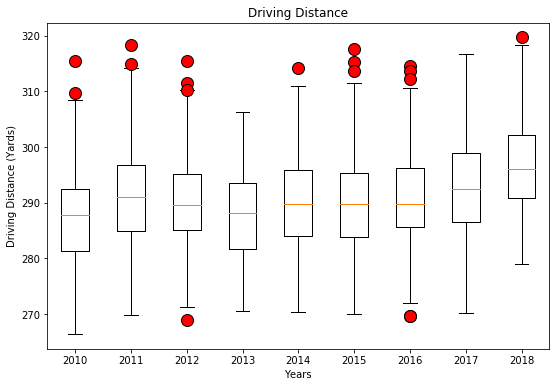

In [11]:
# DRIVING PEFORMANCE
# Boxplot of driving data across years

# Driving Distance - (AVG.)
driv_dist_2010 = cln_all_pga_data_df.loc[cln_all_pga_data_df["Season"]==2010,"Driving Distance - (AVG.)"]
driv_dist_2011 = cln_all_pga_data_df.loc[cln_all_pga_data_df["Season"]==2011,"Driving Distance - (AVG.)"]
driv_dist_2012 = cln_all_pga_data_df.loc[cln_all_pga_data_df["Season"]==2012,"Driving Distance - (AVG.)"]
driv_dist_2013 = cln_all_pga_data_df.loc[cln_all_pga_data_df["Season"]==2013,"Driving Distance - (AVG.)"]
driv_dist_2014 = cln_all_pga_data_df.loc[cln_all_pga_data_df["Season"]==2014,"Driving Distance - (AVG.)"]
driv_dist_2015 = cln_all_pga_data_df.loc[cln_all_pga_data_df["Season"]==2015,"Driving Distance - (AVG.)"]
driv_dist_2016 = cln_all_pga_data_df.loc[cln_all_pga_data_df["Season"]==2016,"Driving Distance - (AVG.)"]
driv_dist_2017 = cln_all_pga_data_df.loc[cln_all_pga_data_df["Season"]==2017,"Driving Distance - (AVG.)"]
driv_dist_2018 = cln_all_pga_data_df.loc[cln_all_pga_data_df["Season"]==2018,"Driving Distance - (AVG.)"]

driv_data_boxplot_to_plot = [driv_dist_2010, driv_dist_2011, driv_dist_2012, \
                             driv_dist_2013, driv_dist_2014, driv_dist_2015, \
                             driv_dist_2016, driv_dist_2017, driv_dist_2018]

# Create figure and axes
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111)

# Create the boxplot
boxplot = ax.boxplot(driv_data_boxplot_to_plot, flierprops=dict(markerfacecolor='r', marker='o', markersize=12.0))
ax.set_xticklabels([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])
ax.set(title = "Driving Distance",
       xlabel = "Years",
       ylabel = "Driving Distance (Yards)")
plt.show()

In [23]:
alpha = 1e-3
print("The null hypothesis is that this sample comes from a normal distribution")

print("For 2010 Driving Distance:")
k2, p = st.normaltest(driv_dist_2010)
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")
print("--------------------------\n")
print("For 2011 Driving Distance:")
k2, p = st.normaltest(driv_dist_2011)
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")
print("--------------------------\n")
print("For 2012 Driving Distance:")
k2, p = st.normaltest(driv_dist_2012)
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")
print("--------------------------\n")
print("For 2013 Driving Distance:")
k2, p = st.normaltest(driv_dist_2013)
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")
print("--------------------------\n")
print("For 2014 Driving Distance:")
k2, p = st.normaltest(driv_dist_2014)
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")
print("--------------------------\n")
print("For 2015 Driving Distance:")
k2, p = st.normaltest(driv_dist_2015)
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")
print("--------------------------\n")
print("For 2016 Driving Distance:")
k2, p = st.normaltest(driv_dist_2016)
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")
print("--------------------------\n")
print("For 2017 Driving Distance:")
k2, p = st.normaltest(driv_dist_2017)
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")
print("--------------------------\n")
print("For 2018 Driving Distance:")
k2, p = st.normaltest(driv_dist_2018)
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")
print("--------------------------\n")






The null hypothesis is that this sample comes from a normal distribution
For 2010 Driving Distance:
p = 0.0708698
The null hypothesis cannot be rejected
--------------------------

For 2011 Driving Distance:
p = 0.093565
The null hypothesis cannot be rejected
--------------------------

For 2012 Driving Distance:
p = 0.113096
The null hypothesis cannot be rejected
--------------------------

For 2013 Driving Distance:
p = 0.0384691
The null hypothesis cannot be rejected
--------------------------

For 2014 Driving Distance:
p = 0.478978
The null hypothesis cannot be rejected
--------------------------

For 2015 Driving Distance:
p = 0.208274
The null hypothesis cannot be rejected
--------------------------

For 2016 Driving Distance:
p = 0.50993
The null hypothesis cannot be rejected
--------------------------

For 2017 Driving Distance:
p = 0.393433
The null hypothesis cannot be rejected
--------------------------

For 2018 Driving Distance:
p = 0.166828
The null hypothesis cannot be 